In [1]:
from astropy.io import fits
import glob
import matplotlib.pyplot as plt
import numpy as np

In [13]:
annulus = 0
combine = [[0,5],[6,9],[10,12],[13,16]]
low = combine[annulus][0]
high = combine[annulus][1]

this_dir  = "/pub/abrought/GALPROPModels/InRings/Masked/"
that_dir  = "/pub/abrought/GALPROPModels/1sigma/tiled_alt/GALPROP/"
#this_file = this_dir + "masked_reprojected_pion_decay_HIR_mapcube_comp_%s_%s_56_Mopra.fits" % (str(low),str(high))

#savefile = that_dir + "pion_decay_HIR_mapcube_comp_1_56_M31_AIC.gz"
#h = fits.open(this_file)

In [3]:
h = fits.open("/pub/abrought/h2sim_output/data/CO12_Baseline/masked_reprojected_pion_decay_annuli_13_16.fits")
h.info()

Filename: /pub/abrought/h2sim_output/data/CO12_Baseline/masked_reprojected_pion_decay_annuli_13_16.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   (1920, 96, 21)   float64   
  1  ENERGIES      1 BinTableHDU     12   21R x 1C   [D]   


In [3]:
h = fits.open("/pub/abrought/GALPROPModels/1sigma/tiled_alt/Masked/masked_reprojected_pion_decay_HIR_mapcube_comp_13_16_56_Mopra.fits")
h.info()

Filename: /pub/abrought/GALPROPModels/1sigma/tiled_alt/Masked/masked_reprojected_pion_decay_HIR_mapcube_comp_13_16_56_Mopra.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   (1920, 96, 21)   float64   
  1  ENERGIES      1 BinTableHDU     12   21R x 1C   [D]   


['/pub/abrought/GALPROPModels/1sigma/tiled_alt/GALPROP/pion_decay_HIR_mapcube_comp_0_56_Mopra.gz', '/pub/abrought/GALPROPModels/1sigma/tiled_alt/GALPROP/pion_decay_HIR_mapcube_comp_10_56_Mopra.gz', '/pub/abrought/GALPROPModels/1sigma/tiled_alt/GALPROP/pion_decay_HIR_mapcube_comp_11_56_Mopra.gz', '/pub/abrought/GALPROPModels/1sigma/tiled_alt/GALPROP/pion_decay_HIR_mapcube_comp_12_56_Mopra.gz', '/pub/abrought/GALPROPModels/1sigma/tiled_alt/GALPROP/pion_decay_HIR_mapcube_comp_13_56_Mopra.gz', '/pub/abrought/GALPROPModels/1sigma/tiled_alt/GALPROP/pion_decay_HIR_mapcube_comp_14_56_Mopra.gz', '/pub/abrought/GALPROPModels/1sigma/tiled_alt/GALPROP/pion_decay_HIR_mapcube_comp_15_56_Mopra.gz', '/pub/abrought/GALPROPModels/1sigma/tiled_alt/GALPROP/pion_decay_HIR_mapcube_comp_16_56_Mopra.gz', '/pub/abrought/GALPROPModels/1sigma/tiled_alt/GALPROP/pion_decay_HIR_mapcube_comp_1_56_Mopra.gz', '/pub/abrought/GALPROPModels/1sigma/tiled_alt/GALPROP/pion_decay_HIR_mapcube_comp_2_56_Mopra.gz', '/pub/abroug

<Figure size 1440x360 with 0 Axes>

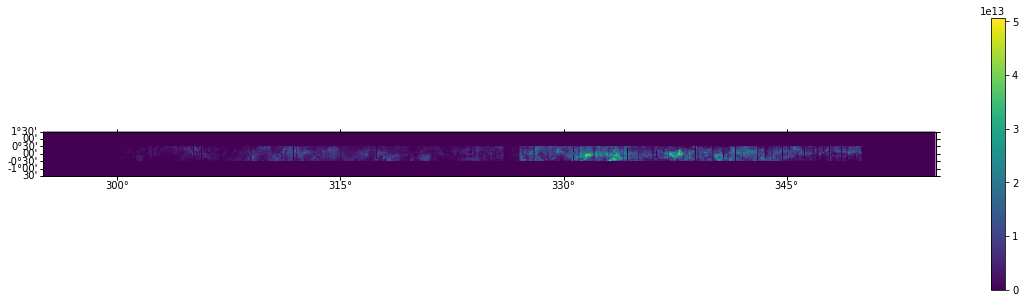

In [18]:
import glob
from astropy.wcs import WCS
plt.figure(figsize=(20,5))

that_dir = "/pub/abrought/GALPROPModels/1sigma/tiled_alt/GALPROP/"
#files = glob.glob(that_dir + "*.gz")
files = glob.glob(that_dir + "*HIR*.gz")
print(files)
h = fits.open(files[0])
img = np.zeros(np.sum(h[0].data, axis=0).shape)
wcs = WCS(h[0].header).sub(2)
for file in files:
    h = fits.open(file)
    tmp = np.sum(h[0].data, axis=0)
    print(file, "| Checksum:", np.sum(h[0].data))
    img += tmp
    #h.close()

fig = plt.figure(figsize=(20,5))
fig.add_subplot(111, projection=wcs)
im = plt.imshow(img)
#plt.imshow(wcs.all_pix2world(img))
plt.colorbar(im)

2.8754970071231898e+17


/data/homezvol2/abrought/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


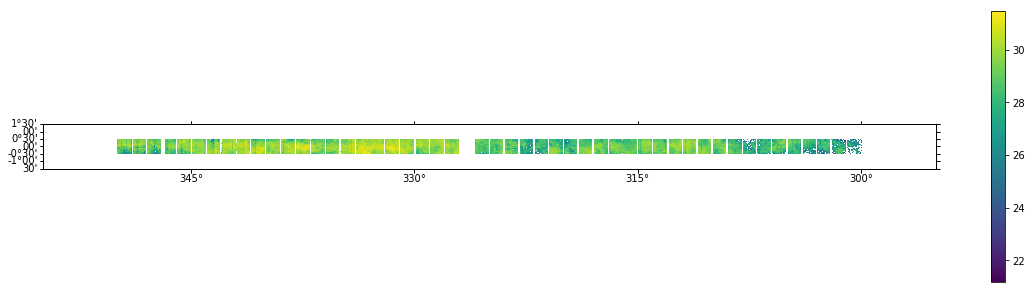

In [19]:
import glob
from astropy.wcs import WCS
fig = plt.figure(figsize=(20,5))
that_dir  = "/pub/abrought/GALPROPModels/1sigma/tiled_alt/Masked/"
files = glob.glob(that_dir + "masked_reprojected_pion_decay_HIR_mapcube_comp_*_*_56_Mopra.fits")
img = np.zeros(np.sum(h[0].data, axis=0).shape)
h = fits.open(files[0])
wcs = WCS(h[0].header).sub(2)
for file in files:
    h = fits.open(file)
    tmp = np.sum(h[0].data, axis=0)
    img += tmp
print(np.sum(img))

fig.add_subplot(111, projection=wcs)
plt.imshow(np.log(img))
plt.colorbar()

In [9]:
fig = plt.figure(figsize=(20,5))
that_dir  = "/pub/abrought/GALPROPModels/InRings/Combined/"
files = glob.glob(that_dir + "reprojected_pion_decay_HIR_mapcube_comp_*_*_56_M31_AIC.fits")
img = np.zeros(np.sum(h[0].data, axis=0).shape)
h = fits.open(files[0])
wcs = WCS(h[0].header).sub(2)
for file in files:
    h = fits.open(file)
    tmp = np.sum(h[0].data, axis=0)
    img += tmp
print(np.sum(img))

fig.add_subplot(111, projection=wcs)
plt.imshow(np.log(img))
plt.colorbar()

IndexError: list index out of range

<Figure size 1440x360 with 0 Axes>

/data/homezvol2/abrought/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


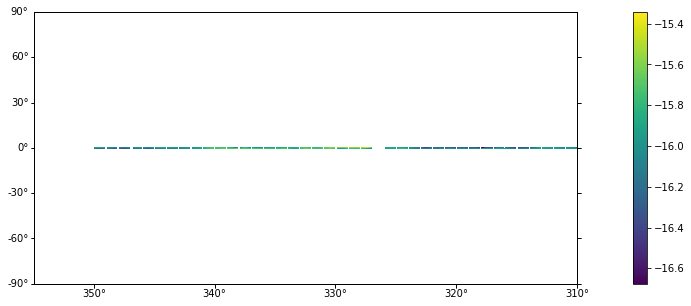

In [ ]:
fig = plt.figure(figsize=(20,5))
that_dir  = "/pub/abrought/GALPROPModels/InRings/Masked/"
files = glob.glob(that_dir + "masked_reprojected_pion_decay_HIR_mapcube_comp_*_*_56_M31_AIC.fits")
img = np.zeros(np.sum(h[0].data, axis=0).shape)
h = fits.open(files[0])
wcs = WCS(h[0].header).sub(2)
for file in files:
    h = fits.open(file)
    tmp = np.sum(h[0].data, axis=0)
    img += tmp

fig.add_subplot(111, projection=wcs)
plt.imshow(np.log(img))
plt.colorbar()

In [ ]:
print(wcs)


WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-CAR'  'GLAT-CAR'  
CRVAL : 355.0  0.0  
CRPIX : 0.0  360.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.03125  0.25  
NAXIS : 1440  720  21
Help on WCS in module astropy.wcs.wcs object:

class WCS(astropy.wcs.WCSBase)
 |  WCS objects perform standard WCS transformations, and correct for
 |  `SIP`_ and `distortion paper`_ table-lookup transformations, based
 |  on the WCS keywords and supplementary data read from a FITS file.
 |  
 |  Parameters
 |  ----------
 |  header : astropy.io.fits header object, Primary HDU, Image HDU, string, dict-like, or None, optional
 |      If *header* is not provided or None, the object will be
 |      initialized to default values.
 |  
 |  fobj : An astropy.io.fits file (hdulist) object, optional
 |      It is needed when header keywords point to a `distortion
 |      paper`_ lookup table stored in a different extension.
 |  
 |  key : str, optional
 |      The name of a particular WC

## Compare Maps

In [12]:
from astropy.wcs import WCS
import matplotlib.pyplot as plt
ig = plt.figure(figsize=(20,5))
that_dir2 = "/pub/abrought/h2sim_output/data/Modified_Maps/*"
that_dir  = "/pub/abrought/GALPROPModels/InRings/Masked/"
files2 = glob.glob(that_dir2 + "*")
files = glob.glob(that_dir + "*")

h = fits.open(files[0])
img = np.zeros(np.sum(h[0].data, axis=0).shape)
img2 = np.zeros(np.sum(h[0].data, axis=0).shape)

wcs = WCS(h[0].header).sub(2)
for file in files:
    h = fits.open(file)
    tmp = np.sum(h[0].data, axis=0)
    img += tmp

for file in files2:
    h = fits.open(file)
    tmp = np.sum(h[0].data, axis=0)
    img2 += tmp
fig = plt.figure(figsize=(15,5))
fig.add_subplot(111, projection=wcs)
plt.imshow(img-img2)
plt.colorbar()

ValueError: operands could not be broadcast together with shapes (720,1440) (96,1920) (720,1440) 

<Figure size 1440x360 with 0 Axes>